https://www.pyimagesearch.com/2017/08/28/fast-optimized-for-pixel-loops-with-opencv-and-python/

In [5]:
import cython
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
%matplotlib inline

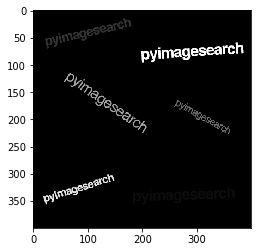

In [7]:
image = cv2.cvtColor(cv2.imread("data/example.png"), cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

In [8]:
%load_ext cython

In [9]:
%%cython -a
def threshold_slow(T, image):
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            image[y, x] = 255 if image[y, x] >= T else 0
            
    # return the thresholded image
    return image

In [10]:
%timeit threshold_slow(5, image)

218 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


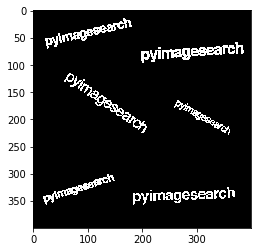

In [11]:
image = threshold_slow(5, image)
plt.imshow(image, cmap="gray")

In [12]:
%%cython -a
import cython

@cython.boundscheck(False)
cpdef unsigned char[:, :] threshold_fast(int T, unsigned char [:, :] image):
    # set the variable extension types
    cdef int x, y, w, h
    
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            image[y, x] = 255 if image[y, x] >= T else 0
    
    # return the thresholded image
    return image

In [13]:
image = cv2.cvtColor(cv2.imread("data/example.png"), cv2.COLOR_BGR2GRAY)

In [ ]:
%timeit threshold_fast(5, image)